In [7]:
import os

os.environ['OMP_NUM_THREADS'] = '1'



##  K-means Clustering: PART (A)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


C:\Users\New\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

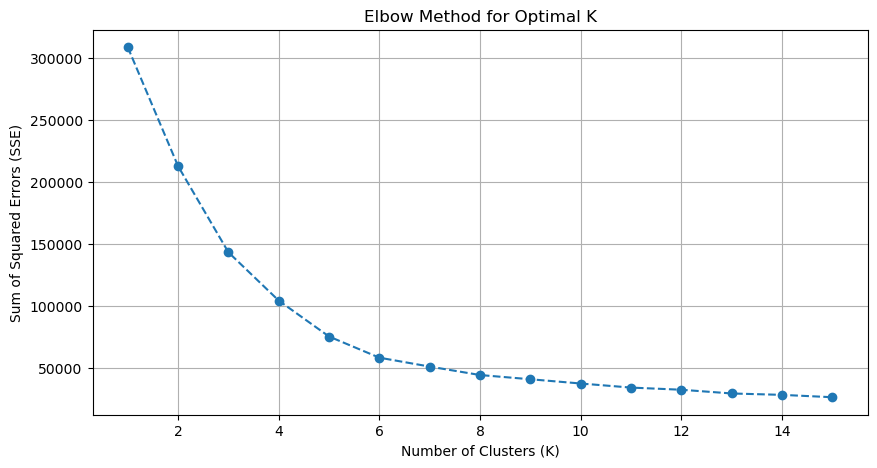

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

d = pd.read_csv("Mall_Customers.csv")
print (d)

X = d[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

sse = []

for k in range(1, 16):

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


## Hierarchical Clustering: PART (B)

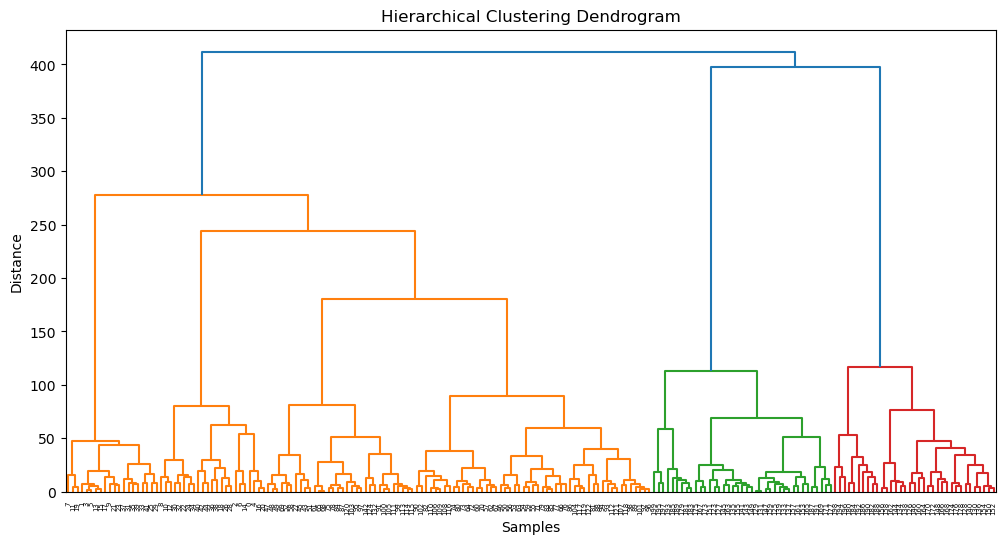

Cluster Labels:
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

print("Cluster Labels:")
print(agg_labels)


## Density-based Clustering: PART (C)
### (using DBSCAN)

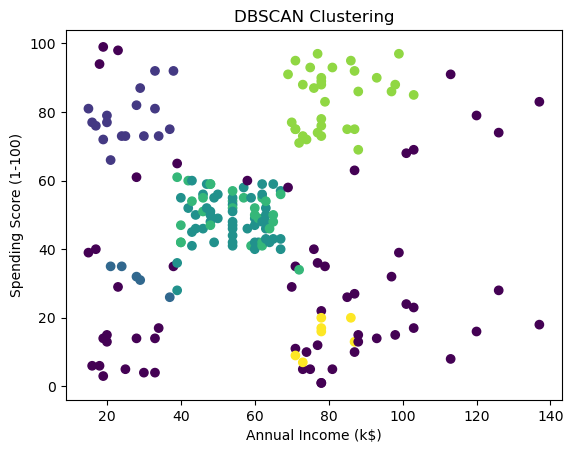

Cluster Labels:
[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  1  0 -1 -1  1  0 -1  0
 -1  0  1 -1  1  0 -1  0 -1  0 -1  0 -1  0  1  0 -1  0  2  3  2 -1  2  3
  3  3  2  3  3  2  2  2  2  2  3  2  2  3  2  2  2  3  2  2  3  3  2  2
  2  2  2  3  2  2  3  2  2  2  2  2  3  2  2  3 -1  2  2  3  2  2  2  3
  2  3  2  3  3  2  2  3  2  3  2  2  2  2  2  3  2  3  3  3  2  2  2  2
  3  2 -1  4 -1  4 -1  4 -1  4  5  4  3  4 -1  4  5  4 -1  4 -1  4 -1  4
 -1  4 -1  4 -1  4  5  4  5  4  5  4 -1  4 -1  4 -1  4 -1  4 -1  4  5  4
 -1 -1  5  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.5  # Maximum distance between two samples to be considered in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

print("Cluster Labels:")
print(dbscan_labels)



### using DBSCAN with a specific epsilon (eps) value

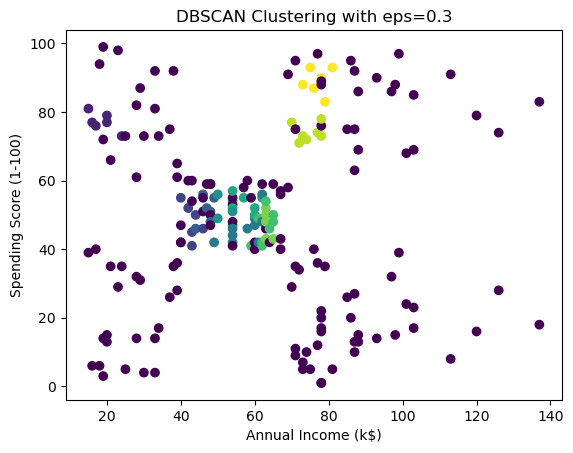

Cluster Labels:
[-1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1  1  2 -1  1  2 -1  2 -1  2 -1 -1  2 -1 -1  2  3
  4  4  4  5 -1 -1  5  3  4 -1 -1  3  5  3 -1  5 -1  3 -1  6  3 -1 -1  5
  3  5  3  6  6  3 -1  5  3  6  7 -1  7  7  7  6 -1  6  6  6  7 -1 -1 -1
 -1 -1 -1 -1 -1  8 -1 -1 -1  8 -1 -1 -1  8 -1  9 -1  8 -1  8 -1  9 -1  9
 -1 -1 -1  8 -1  9 -1 -1 -1 -1 -1 -1 -1  8 -1  8 -1  9 -1  9 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [8]:
eps = 0.3  

dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'DBSCAN Clustering with eps={eps}')
plt.show()

print("Cluster Labels:")
print(dbscan_labels)
